In [66]:
import psi4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import sys 

sys.path.append("..")
from helpers import *

In [67]:
psi4.set_memory('2 GB')
psi4.set_num_threads(4)

In [68]:
r = 1.5
angle2 = 165

# Water Z-Matrix for first suboptimal geometry
h2o_suboptimal2 = psi4.geometry(f"""
O1
H2 1 {r}
H3 1 {r} 2 {angle2}
""")
h2o_suboptimal_start2 = h2o_suboptimal2.clone() # we store here the starting geometry for comparison

In [69]:
# setting the options to write out the xyz files of the optimization
psi4.set_options({'reference':'uhf'})
psi4.core.set_output_file(f'h2o-opt2.log', False)

psi4.set_options({'print_trajectory_xyz_file':True})

In [70]:
# start the geometry optimization
E,hist= psi4.optimize('hf/6-31G', molecule=h2o_suboptimal2,return_history=True)
symbols = [h2o_suboptimal2.symbol(i) for i in range(h2o_suboptimal2.natom())]
bohr_to_ang = 0.52917721092
with open("geoms2.xyz", "w") as f:
    for istep, coords in enumerate(hist['coordinates']):
        coords_ang = coords * bohr_to_ang
        f.write(f"{len(symbols)}  \n")
        f.write(f"Geometry for iteration {istep} \n")
        for sym, (x,y,z) in zip(symbols, coords_ang):
            f.write(f"{sym:2s} {x:15.10f} {y:15.10f} {z:15.10f}\n")

	Change in internal coordinate of 6.56e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 2.
	Change in internal coordinate of 1.01e+00 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 2.
	Change in internal coordinate of 1.34e+00 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 1.
	Energy has increased in a minimization.
	Energy ratio indicates iffy step.
	Intrafrag trust radius decreased to   0.25.
	Change in internal coordinate of 8.33e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 2.
	Change in internal coordinate of 1.16e+00 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 1.
	Change in internal coordinate of 7.33e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 2.
	Change in internal coordinate of 1.04e+00 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 1.


Optimizer: Optimization complete!


In [73]:
drawXYZSideBySide(h2o_suboptimal_start2, h2o_suboptimal2)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [74]:
!grep -A 1 -B 4 '@DF-UHF iter' h2o-opt2.log

  ==> Iterations <==

                           Total Energy        Delta E     RMS |[F,P]|

   @DF-UHF iter SAD:   -74.85395966557383   -7.48540e+01   0.00000e+00 
   @DF-UHF iter   1:   -75.52565464937814   -6.71695e-01   6.72719e-02 ADIIS/DIIS
   @DF-UHF iter   2:   -75.59708827439349   -7.14336e-02   6.17496e-02 ADIIS/DIIS
   @DF-UHF iter   3:   -75.69406494881261   -9.69767e-02   8.28046e-03 ADIIS/DIIS
   @DF-UHF iter   4:   -75.69845809052862   -4.39314e-03   1.76015e-03 ADIIS/DIIS
   @DF-UHF iter   5:   -75.69863070235796   -1.72612e-04   2.45066e-04 ADIIS/DIIS
   @DF-UHF iter   6:   -75.69864038765633   -9.68530e-06   1.37727e-04 ADIIS/DIIS
   @DF-UHF iter   7:   -75.69864834098036   -7.95332e-06   5.20277e-05 DIIS
   @DF-UHF iter   8:   -75.69864966496620   -1.32399e-06   5.15484e-06 DIIS
   @DF-UHF iter   9:   -75.69864967425740   -9.29120e-09   9.40996e-07 DIIS
   @DF-UHF iter  10:   -75.69864967440267   -1.45278e-10   5.51120e-08 DIIS
   @DF-UHF iter  11:   -75.69864967440

In [75]:
!grep -A 10 'Convergence Check' h2o-opt2.log  

	                                 ==> Convergence Check <==                                  
    
	Measures of convergence in internal coordinates in au.
    
	Criteria marked as inactive (o), active & met (*), and active & unmet ( ).

	----------------------------------------------------------------------------------------------~
	   Step    Total Energy     Delta E     Max Force     RMS Force      Max Disp      RMS Disp   ~
	----------------------------------------------------------------------------------------------~
	  Convergence Criteria     1.00e-06 *    3.00e-04 *             o    1.20e-03 *             o~
	----------------------------------------------------------------------------------------------~
--
	                                 ==> Convergence Check <==                                  
    
	Measures of convergence in internal coordinates in au.
    
	Criteria marked as inactive (o), active & met (*), and active & unmet ( ).

	--------------------------------------

In [76]:
!grep 'Measures of convergence' h2o-opt2.log | head -n 1
!grep 'Criteria marked as inactive' h2o-opt2.log | head -n 1
!grep 'Step    Total Energy     Delta E' h2o-opt2.log | head -n 1
!grep '~' h2o-opt2.log 

	Measures of convergence in internal coordinates in au.
	Criteria marked as inactive (o), active & met (*), and active & unmet ( ).
	   Step    Total Energy     Delta E     Max Force     RMS Force      Max Disp      RMS Disp   ~
	----------------------------------------------------------------------------------------------~
	   Step    Total Energy     Delta E     Max Force     RMS Force      Max Disp      RMS Disp   ~
	----------------------------------------------------------------------------------------------~
	  Convergence Criteria     1.00e-06 *    3.00e-04 *             o    1.20e-03 *             o~
	----------------------------------------------------------------------------------------------~
	     1     -75.69864967   -7.57e+01      1.20e-01      1.07e-01 o    3.31e-01      2.89e-01 o  ~
	     2     -75.79740669   -9.88e-02      1.34e-01      1.19e-01 o    6.56e-01      5.77e-01 o  ~
	     3     -75.97196043   -1.75e-01      5.11e-02      4.45e-02 o    3.82e-01      3.64e-0

In [77]:
optimized_geos = readXYZ('geoms2.xyz')
coordinates =  read_coordinates('geoms2.xyz')

In [78]:
angle_dist = []
for coords in coordinates: # iterate over the list of coordinates, coords being a single point calculation result
    angle_dist.append(angle_distances(coords))

h2o_angles_dist = np.array(angle_dist[1:])
h2o_angles_dist

array([[ 154.82585378,    1.32510360,    1.32510360],
       [ 133.37599604,    0.97812980,    0.97812980],
       [ 111.46566050,    0.79080609,    0.79080609],
       [ 112.07345681,    0.88427031,    0.88427031],
       [ 112.80932981,    0.95152390,    0.95152390],
       [ 111.02057551,    0.94943779,    0.94943779],
       [ 111.70377682,    0.94990544,    0.94990544],
       [ 111.55084872,    0.94975327,    0.94975327]])

In [79]:
geo_opt_energies = !grep -a '@DF-UHF Final Energy' h2o-opt.log
geo_opt_energies = [float(x.replace('  @DF-UHF Final Energy:   ',''))  for x in geo_opt_energies] # this is some formatting to get the values from the text file
geo_opt_energies

[-75.7671380085819,
 -75.85604058724778,
 -75.98238127878481,
 -75.98328017462997,
 -75.98412348871801,
 -75.98533553328173,
 -75.98534371690391]

In [80]:
# load in files for PES
PES_water = np.load('PES_water/water-hf-6-31G-energies.npy')
PES_r = np.load('PES_water/water-hf-6-31G-distances.npy')
PES_angle = np.load('PES_water/water-hf-6-31G-angle.npy')


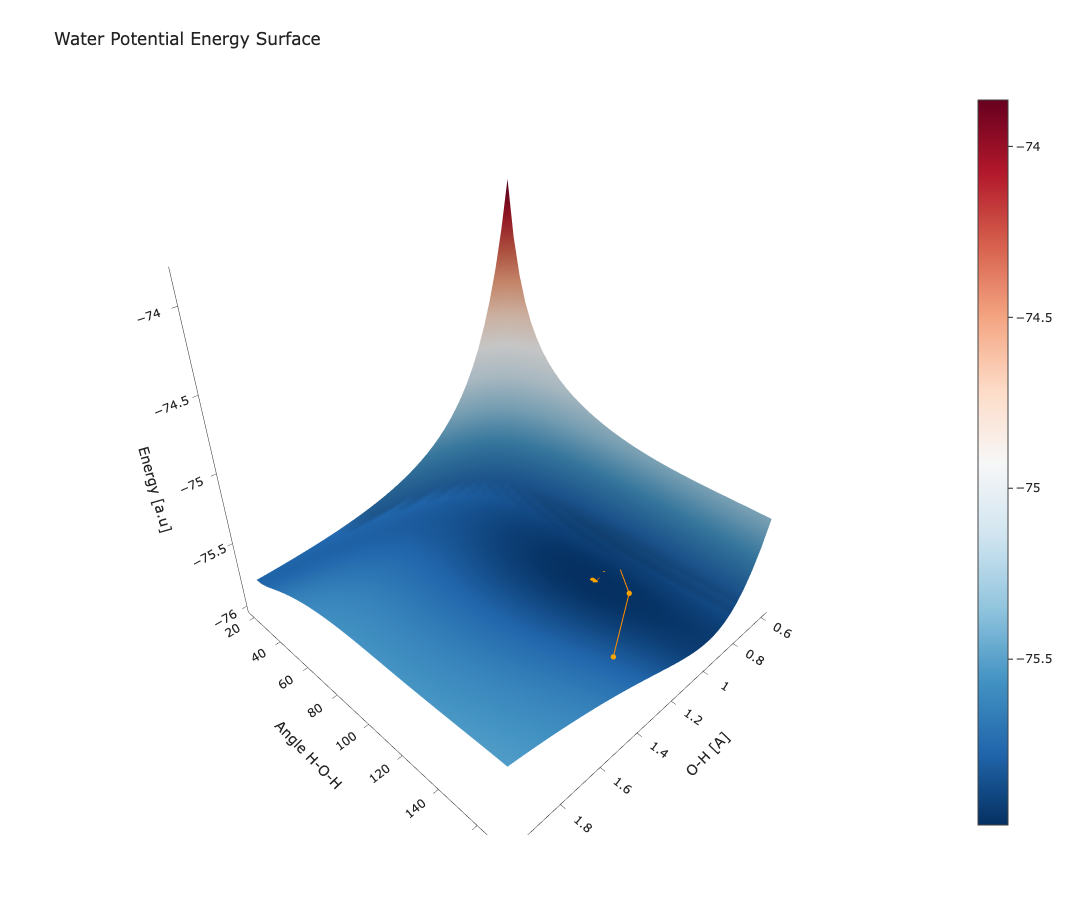

In [81]:
# this sets up the plotting widget
fig = go.Figure(data=[go.Surface(z=PES_water, 
                                 x=PES_r,
                                 y=PES_angle,
                                 colorscale='RdBu',
                                 reversescale=True,
                                 hoverinfo='none',
                                 name='Full PES',
                                 contours=go.surface.Contours(
                                    x=go.surface.contours.X(highlight=False),
                                    y=go.surface.contours.Y(highlight=False),
                                    z=go.surface.contours.Z(highlight=False),
                                )
                                )  
                     ])
# here we plot our geometry optimization results
# change the z, x, y options if you plot multiple lines, you can also change the colors
fig.add_scatter3d(z=geo_opt_energies, x=h2o_angles_dist[:,1], y=h2o_angles_dist[:,0],mode='markers+lines', marker=dict(size=3, color='orange', opacity=1),
                   line=dict(color='darkorange',width=2),
                   name="Geometry Optimization"
                 )

# this is comesmetics to add labeles etc.
fig.update_layout(title='Water Potential Energy Surface', autosize=False,
                  template='simple_white',
                  width=900, height=900,
                  scene = dict(
                      xaxis_title="O-H [A]",
                      yaxis_title="Angle H-O-H",
                      zaxis_title='Energy [a.u]',
                      xaxis_showspikes=False,
                      yaxis_showspikes=False),
                   margin=dict(l=65, r=50, b=65, t=90))
# to display the figure
fig.show()

In [82]:
drawXYZGeomSlider(optimized_geos)

interactive(children=(IntSlider(value=0, description='conf', max=7), Output()), _dom_classes=('widget-interact…

1) D'où sort le potentiel de l'eau, comment on le calcule ?
2) Comment se fait-il que pour une certaine configuration angulaire ou de distance on est sur la courbe, est ce que $E_{pot,H_2O}(r,\alpha)$ ?
3) Pourquoi 7 étapes, pourquoi on s'arrête alors que l'énergie converge à $-8.10^{-6}$ ce qui en valeur absolue ne correspond pas au treashold à $10^{-6}$
4) Est ce qu'on doit reprendre le meme potentiel dans la dernière question ?